# Titanic Survivor Project

In [143]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
sns.set_style('whitegrid')

# 1. Exploring the dataset

In [144]:
df = pd.read_csv('dataset/train.csv')
print(df.shape, '\n')
titanic=df.copy()
df.head()

(891, 12) 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Which features are categorical?

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

Categorical: Survived, Sex and Embarked. 
Ordinal: Pclass.
#### Which features are numerical?

Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

Continous: Age, Fare.
Discrete: SibSp, Parch.
#### Which features are mixed data types?

Numerical, alphanumeric data within same feature. These are candidates for correcting goal.

Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.
#### Which features may contain errors or typos?

This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.

Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.
#### Which features contain blank, null or empty values?

These will require correcting.

Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
Cabin > Age are incomplete in case of test dataset.
#### What are the data types for various features?

Helping us during converting goal.

Seven features are integer or floats. Six in case of test dataset.
Five features are strings (object).

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### What is the distribution of numerical feature values across the samples?

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).

Survived is a categorical feature with 0 or 1 values.

Around 38% samples survived representative of the actual survival rate at 32%.

Most passengers (> 75%) did not travel with parents or children.

Nearly 30% of the passengers had siblings and/or spouse aboard.

Fares varied significantly with few passengers (<1%) paying as high as $512.

Few elderly passengers (<1%) within age range 65-80.

In [146]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### What is the distribution of categorical features?

Names are unique across the dataset (count=unique=891)

Sex variable as two possible values with 65% male (top=male, freq=577/count=891).

Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.

Embarked takes three possible values. S port used by most passengers (top=S)

Ticket feature has high ratio (22%) of duplicate values (unique=681).

# 2. Calculating the missing values

In [147]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

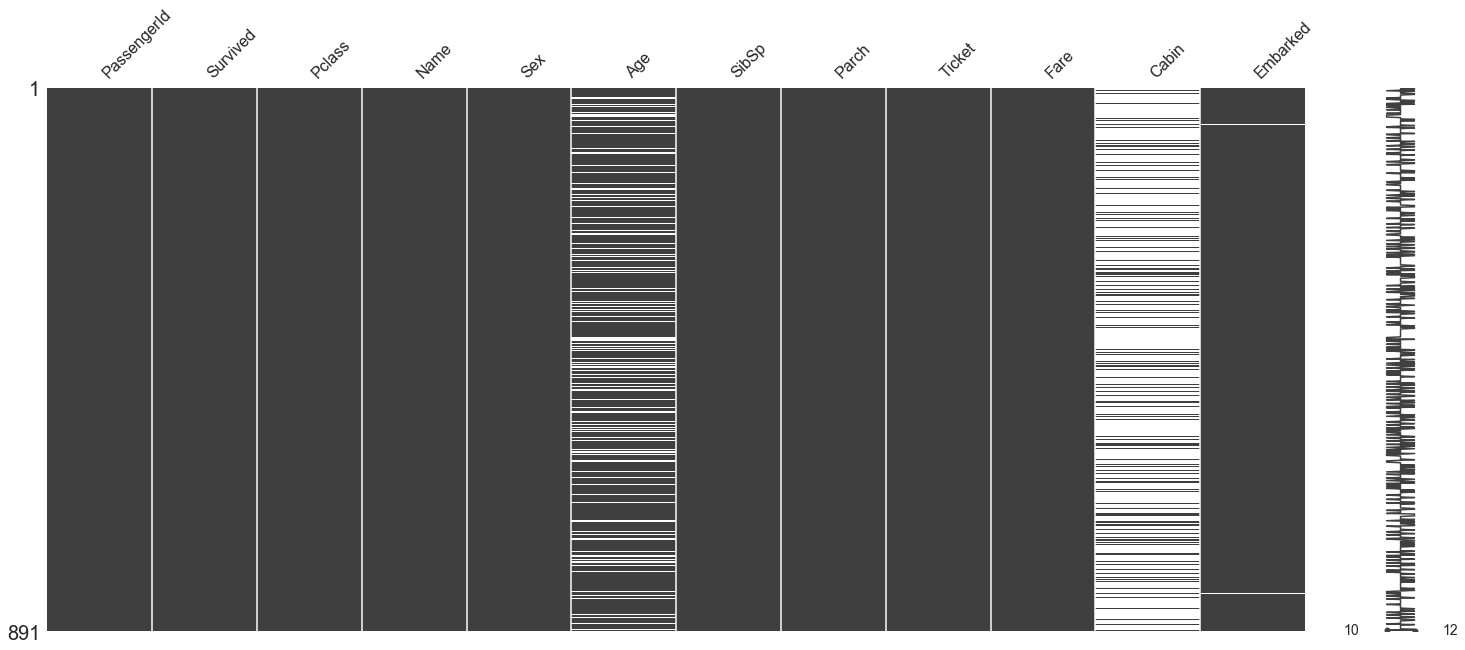

In [148]:
msno.matrix(df)

In [149]:
print('Total values in Cabin:',len(df.Cabin))
print('Null values in Cabin:',df.Cabin.isnull().sum())

Total values in Cabin: 891
Null values in Cabin: 687


#### 77% of values in Cabin feature are null.
We can drop this feature column.

In [150]:
df.drop('Cabin', axis=1, inplace=True) # Dropping the coulmn 'CABIN'

##### Now NaN Values are in Age feature. We will replace those values with the mean.

#### Replacing the missing values from Age feature

In [151]:
df['Age'].fillna((df['Age'].mean()), inplace=True)

#### Now also fill the missing values from Embarked feature

In [152]:
df['Embarked'].fillna('S', inplace=True)

In [153]:
df.Embarked.describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

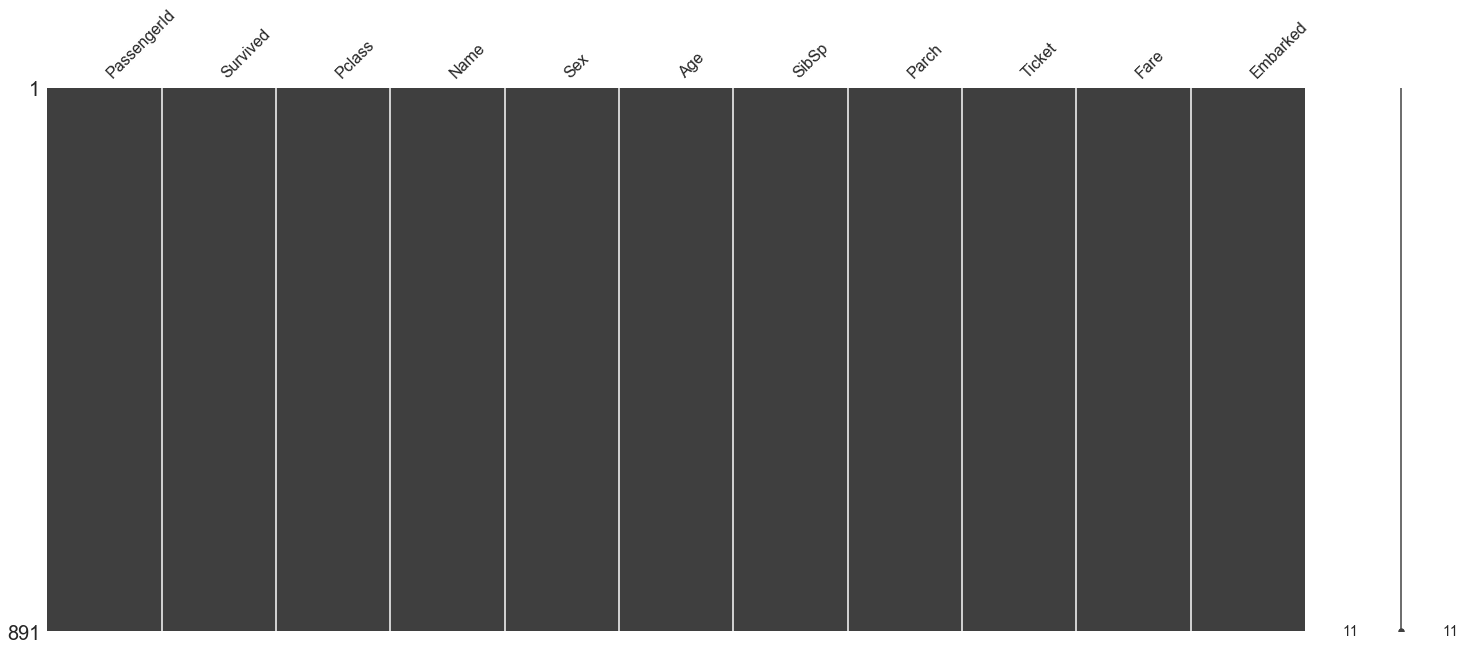

In [154]:
msno.matrix(df)

### GREAT, the data is clean.

In [155]:
df.Embarked.describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

# 3. Anaylzing and Visualizing all the features

## 3.1) Survived --> Target feature

In [156]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

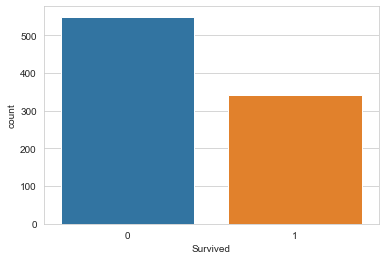

In [157]:
sns.countplot('Survived', data=df)

# Anaylzing and Visualizing all the features

## 3.2) Pclass

In [158]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

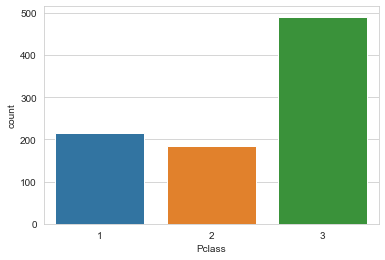

In [159]:
sns.countplot('Pclass', data=df)

#### We observed that count of people was maximum in Pclass-3(491), moderate in Pclass-1(216) and minimum in Pclass-2(184).  
#### But why? Lets find out.

## 3.2.1) Pclass v/s Fare

In [160]:
df.groupby('Pclass').Fare.mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

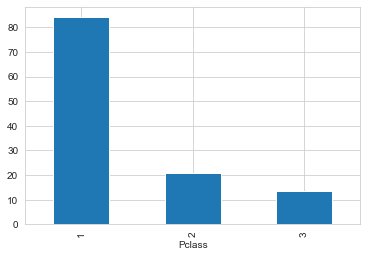

In [161]:
df.groupby('Pclass').Fare.mean().plot.bar()

##### We observed that the Fare is maximum in Pclass-1(84), modearte in Pclass=2(20) and minimum in Pclass-3(13).
##### 1. This concludes that the fare was minimum in Pclass-3, thats why there were maximum passengers in Pclass-3.
##### 2. Mostly passengers were not rich(more than half).
##### 3. Pclass was divided on the basis of Fare. Rich in Pclass-1, Medium in Pclass-2 and Poor in Pclass-3.

## 3.2.2) Pclass v/s Survived (target feature)

In [162]:
df.groupby('Pclass').Survived.value_counts().unstack()

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


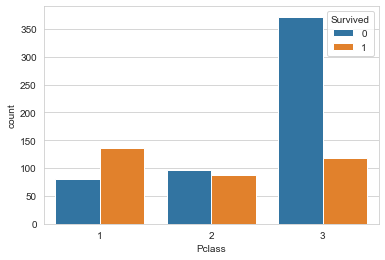

In [163]:
sns.countplot('Pclass', data=df, hue='Survived')

In [164]:
df.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

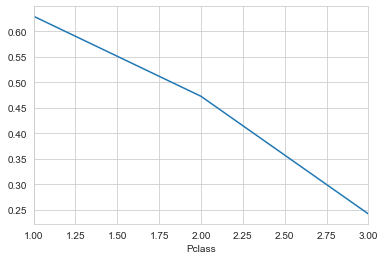

In [165]:
df.groupby('Pclass').Survived.mean().plot()

#### We observed that: 
##### 1. Maximum no. of people who survived were of Pclass 1(mean=0.62).
##### 2. Minimum no. of people who survived were of Pclass 3(mean=0.24).

## 3.2.3) Pclass vs Sex

In [166]:
df.groupby('Pclass').Sex.value_counts().unstack()

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


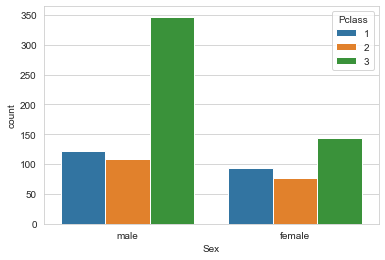

In [167]:
sns.countplot('Sex', data=df, hue='Pclass')

## 3.2.4) Pclass vs Age

In [168]:
df.groupby('Pclass').Age.mean()

Pclass
1    37.048118
2    29.866958
3    26.403259
Name: Age, dtype: float64

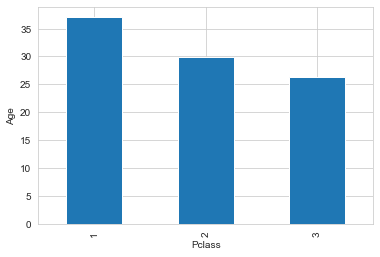

In [169]:
plt.ylabel('Age')
df.groupby('Pclass').Age.mean().plot.bar()

## 3.2.5) Pclass vs Parch

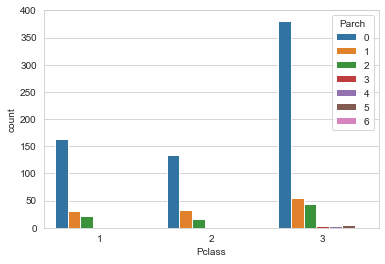

In [170]:
sns.countplot('Pclass', data=df, hue='Parch')

## 3.3) Sex

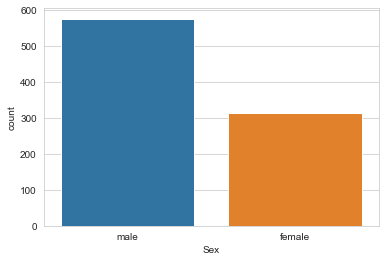

In [171]:
sns.countplot('Sex', data=df)

## 3.3.1) Sex v/s Survived(target feature)

In [172]:
df.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

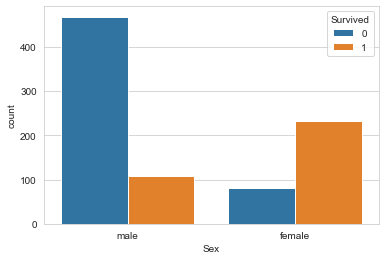

In [173]:
sns.countplot('Sex', data=df, hue='Survived')

## 3.3.2) Sex v/s Pclass

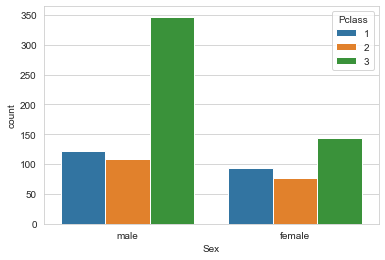

In [174]:
sns.countplot('Sex', data=df, hue='Pclass')

## 3.3.3) Sex vs SibSp

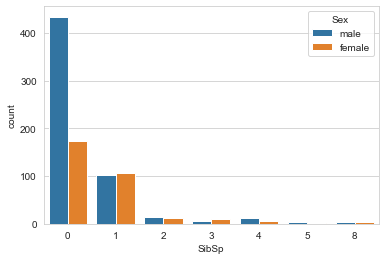

In [175]:
sns.countplot('SibSp', data=df, hue='Sex')

## 3.3.4) Sex vs Parch

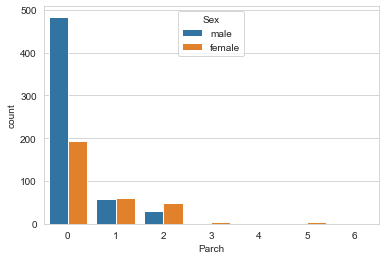

In [176]:
sns.countplot('Parch', data=df, hue='Sex')

## 3.3.5) Sex vs Embarked

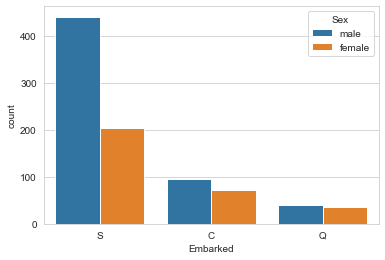

In [177]:
sns.countplot('Embarked', data=df, hue='Sex')

### 3.4) Age

(array([ 30.,  17.,  15.,   9.,  29.,  64.,  67.,  70.,  83., 239.,  51.,
         40.,  35.,  27.,  35.,  23.,  15.,   9.,  11.,  11.,   4.,   2.,
          3.,   1.,   1.]),
 array([ 0.42  ,  3.6032,  6.7864,  9.9696, 13.1528, 16.336 , 19.5192,
        22.7024, 25.8856, 29.0688, 32.252 , 35.4352, 38.6184, 41.8016,
        44.9848, 48.168 , 51.3512, 54.5344, 57.7176, 60.9008, 64.084 ,
        67.2672, 70.4504, 73.6336, 76.8168, 80.    ]),
 <a list of 25 Patch objects>)

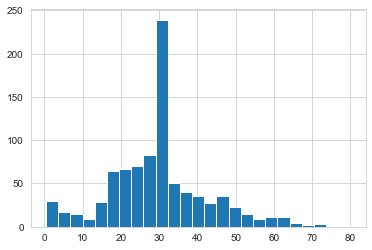

In [178]:
plt.hist('Age', data=df, bins=25)

## 3.4.1) Age vs Survived

In [179]:
df.groupby('Age').Survived.mean()

Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 89, dtype: float64

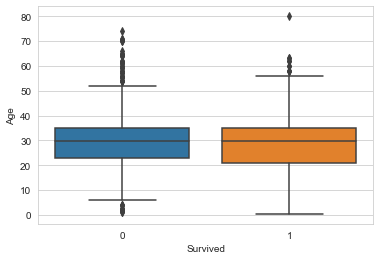

In [180]:
sns.boxplot('Survived','Age', data=df)

## 3.4.2) Age vs Pclass

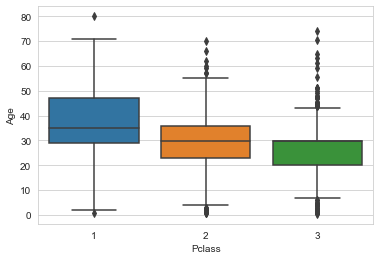

In [181]:
sns.boxplot('Pclass', 'Age', data=df)

## 3.4.3) Age vs SibSp

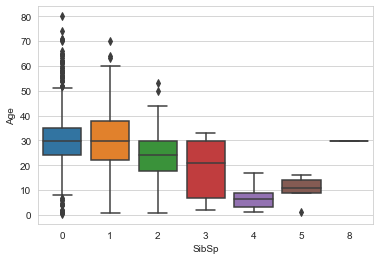

In [182]:
sns.boxplot('SibSp', 'Age', data=df)

## 3.4.4) Age vs Parch

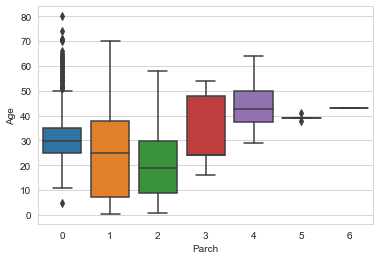

In [183]:
sns.boxplot('Parch', 'Age', data=df)

## 3.4.5) Age vs Embarked

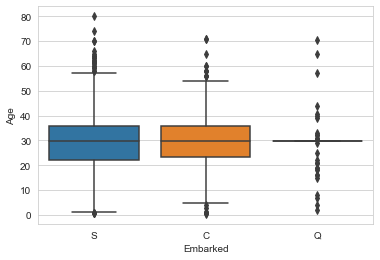

In [184]:
sns.boxplot('Embarked', 'Age', data=df)

## 3.5) SibSp

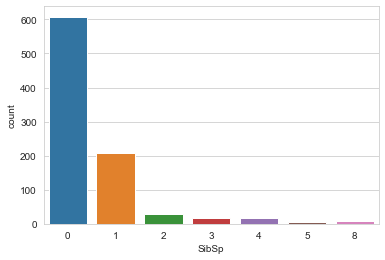

In [185]:
sns.countplot('SibSp', data=df)

## 3.5.1) SibSp vs Survived

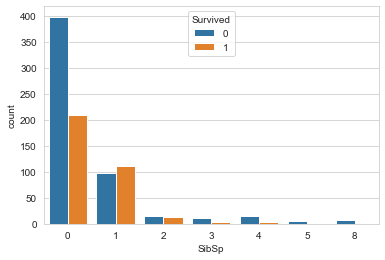

In [186]:
sns.countplot('SibSp', data=df, hue='Survived')

## 3.5.2) SibSp vs Age

In [187]:
df.groupby('SibSp').Survived.mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

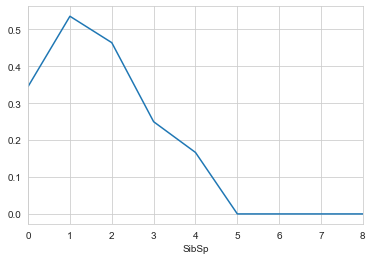

In [188]:
df.groupby('SibSp').Survived.mean().plot()

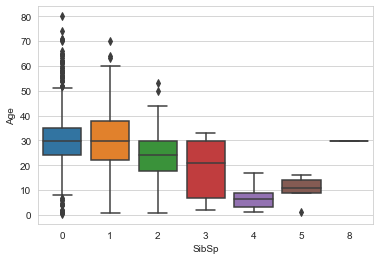

In [189]:
sns.boxplot('SibSp', 'Age', data=df)

## 3.5.3) SibSp vs Pclass

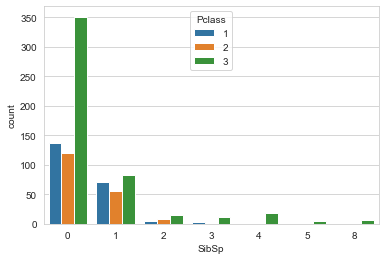

In [190]:
sns.countplot('SibSp', data=df, hue='Pclass')

## 3.5.4) SibSp vs Parch

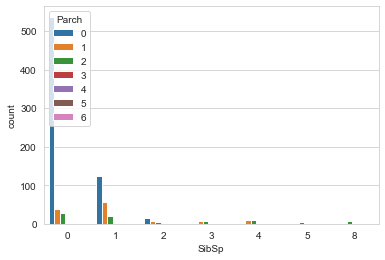

In [191]:
sns.countplot('SibSp', data=df, hue='Parch')

## 3.5.5) SibSp vs Embarked

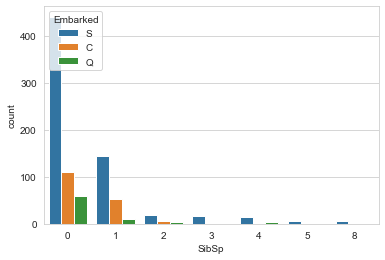

In [192]:
sns.countplot('SibSp', data=df, hue='Embarked')

## 3.6) Parch

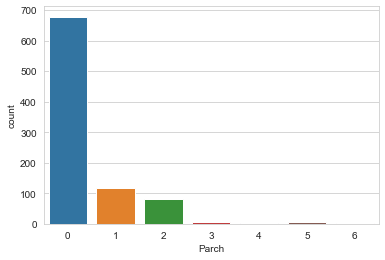

In [193]:
sns.countplot('Parch', data=df)

## 3.6.1) Parch vs Survived

In [194]:
df.groupby('Parch').Survived.mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

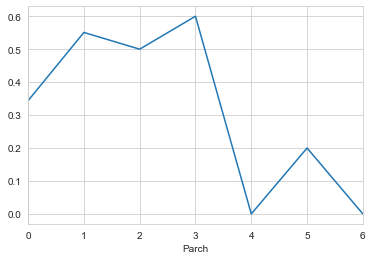

In [195]:
df.groupby('Parch').Survived.mean().plot()

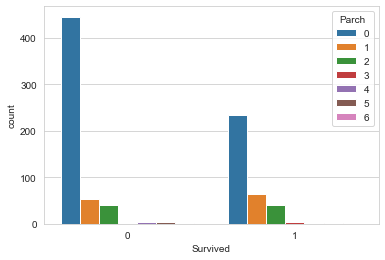

In [196]:
sns.countplot('Survived', data=df, hue='Parch')

## 3.7) Ticket

(array([53., 43., 54., 39., 35., 46., 32., 34., 46., 38., 42., 30., 37.,
        36., 29., 31., 30., 29., 32., 29., 32., 29., 29., 28., 28.]),
 array([  0. ,  27.2,  54.4,  81.6, 108.8, 136. , 163.2, 190.4, 217.6,
        244.8, 272. , 299.2, 326.4, 353.6, 380.8, 408. , 435.2, 462.4,
        489.6, 516.8, 544. , 571.2, 598.4, 625.6, 652.8, 680. ]),
 <a list of 25 Patch objects>)

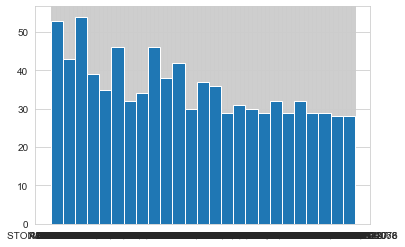

In [197]:
plt.hist('Ticket', data=df, bins=25)

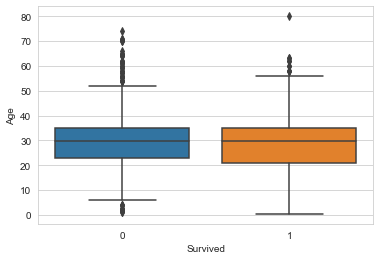

In [198]:
sns.boxplot('Survived','Age', data=df)

## 3.8) Fare

(array([519., 197.,  55.,  47.,  20.,  15.,   7.,   9.,   2.,   0.,   5.,
          4.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   3.]),
 array([  0.      ,  20.493168,  40.986336,  61.479504,  81.972672,
        102.46584 , 122.959008, 143.452176, 163.945344, 184.438512,
        204.93168 , 225.424848, 245.918016, 266.411184, 286.904352,
        307.39752 , 327.890688, 348.383856, 368.877024, 389.370192,
        409.86336 , 430.356528, 450.849696, 471.342864, 491.836032,
        512.3292  ]),
 <a list of 25 Patch objects>)

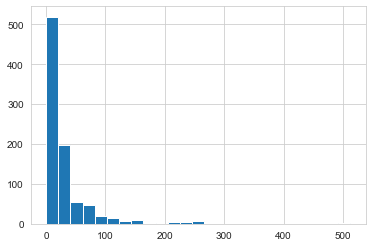

In [199]:
plt.hist('Fare', data=df,bins=25)

## 3.8.1)Fare vs Survived

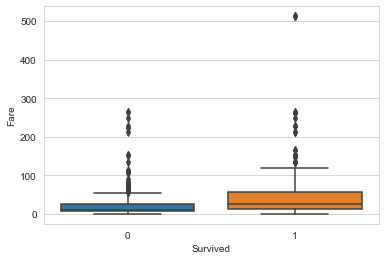

In [200]:
sns.boxplot('Survived','Fare', data=df)

### 3.9) Embarked

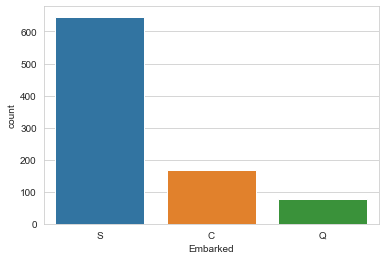

In [201]:
sns.countplot('Embarked', data=df)

## 3.8.1) Embarked vs Survived

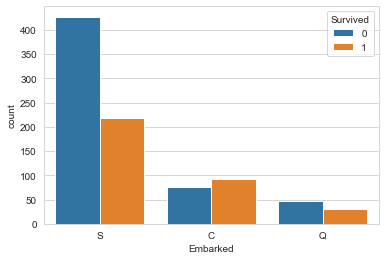

In [202]:
sns.countplot('Embarked',hue='Survived', data=df)

In [203]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [204]:
df.to_csv('dataset/eda.csv', index=False)